In [1]:
!pip install ppscore

# 1.Data Exploration and Preprocessing:

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

df=pd.read_csv('adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Data Exploration
print("Dataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Summary Statistics:
                 age workclass        fnlwgt educ

In [5]:
# Handle Missing Values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [6]:
 #Example of handling missing values
# Impute missing values in 'workclass' and 'occupation' with the mode
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)


In [7]:
# If 'native-country' exists, handle missing values
if 'native-country' in df.columns:
    # Drop rows where 'native-country' is missing
    df.dropna(subset=['native-country'], inplace=True)
else:
    print("'native-country' column is not found in the dataset.")


'native-country' column is not found in the dataset.


In [8]:
# Scaling Techniques
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()


In [9]:
# Standard Scaling
standard_scaler = StandardScaler()
df[numerical_features] = standard_scaler.fit_transform(df[numerical_features])


In [10]:
# Min-Max Scaling (Example with 'age' column if it exists)
if 'age' in df.columns:
    minmax_scaler = MinMaxScaler()
    df['age'] = minmax_scaler.fit_transform(df[['age']])


In [11]:
# Discuss Scaling Techniques
print("\nScaling Techniques:")
print("Standard Scaling is preferred when you want features to have a mean of 0 and a standard deviation of 1, which is useful for algorithms that assume normally distributed data.")
print("Min-Max Scaling scales features to a fixed range, typically 0 to 1. It is useful when features have different units or when you need bounded data for algorithms like neural networks.")



Scaling Techniques:
Standard Scaling is preferred when you want features to have a mean of 0 and a standard deviation of 1, which is useful for algorithms that assume normally distributed data.
Min-Max Scaling scales features to a fixed range, typically 0 to 1. It is useful when features have different units or when you need bounded data for algorithms like neural networks.


In [12]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Features:")
print(categorical_features)



Categorical Features:
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [13]:
# Determine low and high cardinality features
low_cardinality_features = [col for col in categorical_features if df[col].nunique() < 5]
high_cardinality_features = [col for col in categorical_features if df[col].nunique() >= 5]


In [14]:
print("\nLow Cardinality Features:")
print(low_cardinality_features)
print("\nHigh Cardinality Features:")
print(high_cardinality_features)



Low Cardinality Features:
['sex', 'income']

High Cardinality Features:
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']


In [15]:
# One-Hot Encoding
if low_cardinality_features:
    one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
    # Ensure these columns exist
    df_low_cardinality = df[low_cardinality_features]
    df_one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df_low_cardinality),
                                      columns=one_hot_encoder.get_feature_names_out(low_cardinality_features))
    df = df.drop(low_cardinality_features, axis=1).join(df_one_hot_encoded)


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
# Label Encoding
label_encoder = LabelEncoder()
for feature in high_cardinality_features:
    if feature in df.columns:
        df[feature] = label_encoder.fit_transform(df[feature])


In [17]:
# Discuss Encoding Techniques
print("\nEncoding Techniques:")
print("One-Hot Encoding creates new columns for each category, which is beneficial for algorithms that can handle high-dimensional data but increases feature space.")
print("Label Encoding assigns each category a unique integer, which is compact but may introduce ordinal relationships where none exist.")



Encoding Techniques:
One-Hot Encoding creates new columns for each category, which is beneficial for algorithms that can handle high-dimensional data but increases feature space.
Label Encoding assigns each category a unique integer, which is compact but may introduce ordinal relationships where none exist.


In [18]:
# Feature Engineering
print("\nFeature Engineering:")
# Ensure 'age' and 'hours-per-week' columns exist before creating new features
if 'age' in df.columns:
    df['age_squared'] = df['age'] ** 2
else:
    print("'age' column is not found in the dataset.")

if 'hours-per-week' in df.columns:
    df['hours_per_week_squared'] = df['hours-per-week'] ** 2
    # Log Transformation for skewed features
    df['log_hours_per_week'] = np.log1p(df['hours-per-week'])
else:
    print("'hours-per-week' column is not found in the dataset.")



Feature Engineering:
'hours-per-week' column is not found in the dataset.


In [19]:
# Feature Selection
# Isolation Forest for Outlier Detection
iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(df.select_dtypes(include=[np.number])) == -1
df = df[~outliers]


In [20]:
# Correlation Matrix for feature relationships
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                     age  workclass    fnlwgt  education  education_num  \
age             1.000000   0.058792 -0.077248   0.010466       0.062381   
workclass       0.058792   1.000000 -0.023831   0.008546       0.040256   
fnlwgt         -0.077248  -0.023831  1.000000  -0.030735      -0.050992   
education       0.010466   0.008546 -0.030735   1.000000       0.339874   
education_num   0.062381   0.040256 -0.050992   0.339874       1.000000   
marital_status -0.357572  -0.053764  0.035813  -0.029794      -0.054274   
occupation      0.006020   0.217111 -0.003787  -0.031228       0.102493   
relationship   -0.296621  -0.096689  0.008359  -0.004693      -0.098127   
race            0.045795   0.043997 -0.031342   0.001287       0.031749   
capital_gain    0.062099   0.023529 -0.013140   0.017736       0.099537   
capital_loss    0.041252   0.011157 -0.009303   0.018110       0.072678   
hours_per_week  0.155882   0.111456 -0.022383   0.050918       0.141552   
nati

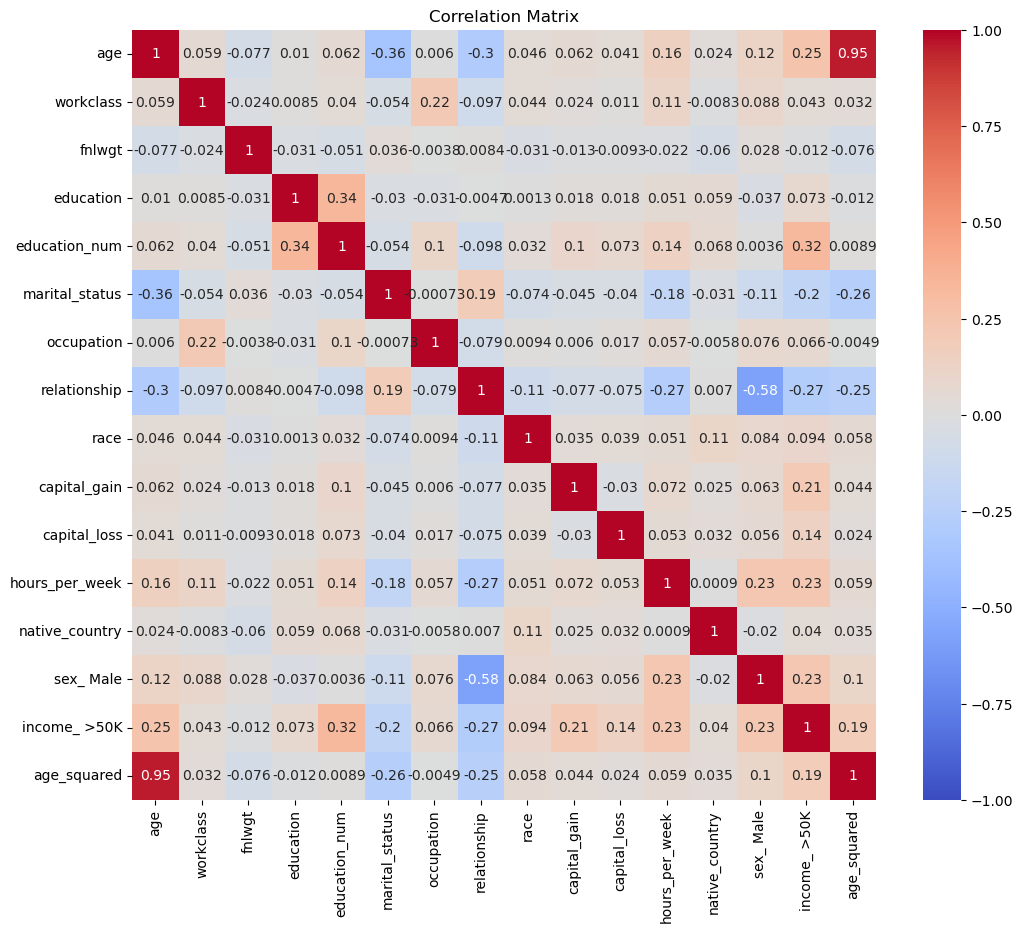

In [21]:
# Plotting Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [22]:
# Display the final processed dataframe
print("\nProcessed DataFrame:")
print(df.head())


Processed DataFrame:
        age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.301370          7 -1.063611          9       1.134739               4   
1  0.452055          6 -1.008707          9       1.134739               2   
2  0.287671          4  0.245079         11      -0.420060               0   
3  0.493151          4  0.425801          1      -1.197459               2   
4  0.150685          4  1.408176          9       1.134739               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4      0.148453      -0.21666       -0.035429   
1           4             0     4     -0.145920      -0.21666       -2.222153   
2           6             1     4     -0.145920      -0.21666       -0.035429   
3           6             0     2     -0.145920      -0.21666       -0.035429   
4          10             5     2     -0.145920      -0.21666       -0.035429   

   native_country  sex